In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%pwd

'C:\\Users\\Himalay'

#### Importing dataset
    1.Since data is in form of excel file we have to use pandas read_excel to load the data
    2.After loading it is important to check null values in a column or a row
    3.If it is present then following can be done,
        a.Filling NaN values with mean, median and mode using fillna() method
        b.If Less missing values, we can drop it as well


In [4]:
data= pd.read_excel('C:\\Users\\Himalay\\Airfare project\\Data_Train.xlsx')


In [5]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [6]:
data.shape

(10683, 11)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [8]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [9]:
data.dropna(inplace=True)

#### From description we can see that Date_of_Journey is a object data type,
     Therefore, we have to convert this datatype into timestamp so as to use this column properly for prediction,bcz our 
     model will not be able to understand Theses string values,it just understand Time-stamp
    For this we require pandas to_datetime to convert object data type to datetime dtype.


    dt.day method will extract only day of that date
    dt.month method will extract only month of that date

In [10]:
def con_datetime(data,col):
    data[col]=pd.to_datetime(data[col])

In [11]:
for i in ['Date_of_Journey','Arrival_Time','Dep_Time']:
    con_datetime(data,i)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10682 non-null  object        
 1   Date_of_Journey  10682 non-null  datetime64[ns]
 2   Source           10682 non-null  object        
 3   Destination      10682 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10682 non-null  datetime64[ns]
 6   Arrival_Time     10682 non-null  datetime64[ns]
 7   Duration         10682 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10682 non-null  object        
 10  Price            10682 non-null  int64         
dtypes: datetime64[ns](3), int64(1), object(7)
memory usage: 1001.4+ KB


In [13]:
data['Journey_Day']=data['Date_of_Journey'].dt.day
data['Month']=data['Date_of_Journey'].dt.month
data.drop('Date_of_Journey',axis=1,inplace=True)


In [14]:
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,2021-07-23 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-07-23 05:50:00,2021-07-23 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2021-07-23 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2021-07-23 18:05:00,2021-07-23 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2021-07-23 16:50:00,2021-07-23 21:35:00,4h 45m,1 stop,No info,13302,3,1


In [15]:
data['dep_hour']=data['Dep_Time'].dt.hour
data['dep_min']=data['Dep_Time'].dt.minute
data.drop('Dep_Time',axis=1,inplace=True)
data['Arrival_hour']=data['Arrival_Time'].dt.hour
data['Arrival_min']=data['Arrival_Time'].dt.minute
data.drop('Arrival_Time',axis=1,inplace=True)

In [16]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Month,dep_hour,dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


#### Lets Apply pre-processing on duration column,Separate Duration hours and minute from duration

In [17]:
data[~data['Duration'].str.contains('h')]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Month,dep_hour,dep_min,Arrival_hour,Arrival_min
6474,Air India,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,5m,2 stops,No info,17327,3,6,16,50,16,55


In [18]:
dur_df=data['Duration'].str.split(' ',expand=True)
dur_df=dur_df.rename(columns={0:'dur_hr',1:'dur_min'})
dur_df['dur_min'].iloc[6474]='5m'
dur_df['dur_hr'].iloc[6474]='0h'
dur_df['dur_min'].fillna('0m',inplace=True)

In [19]:
type(dur_df)

pandas.core.frame.DataFrame

In [20]:
data=data.join(dur_df)

In [21]:
data

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Month,dep_hour,dep_min,Arrival_hour,Arrival_min,dur_hr,dur_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2h,50m
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15,7h,25m
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25,19h,0m
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30,5h,25m
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35,4h,45m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No info,4107,4,9,19,55,22,25,2h,30m
10679,Air India,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,4145,27,4,20,45,23,20,2h,35m
10680,Jet Airways,Banglore,Delhi,BLR → DEL,3h,non-stop,No info,7229,27,4,8,20,11,20,3h,0m
10681,Vistara,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,No info,12648,3,1,11,30,14,10,2h,40m


In [22]:
data['dur_hr']=data['dur_hr'].str.replace('h','')

In [23]:
data['dur_min']=data['dur_min'].str.replace('m','')

In [24]:
data.drop('Duration',axis=1,inplace=True)

In [25]:
data['dur_hr']=data['dur_hr'].astype(int)
data['dur_min']=data['dur_min'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Route            10682 non-null  object
 4   Total_Stops      10682 non-null  object
 5   Additional_Info  10682 non-null  object
 6   Price            10682 non-null  int64 
 7   Journey_Day      10682 non-null  int64 
 8   Month            10682 non-null  int64 
 9   dep_hour         10682 non-null  int64 
 10  dep_min          10682 non-null  int64 
 11  Arrival_hour     10682 non-null  int64 
 12  Arrival_min      10682 non-null  int64 
 13  dur_hr           10682 non-null  int32 
 14  dur_min          10682 non-null  int32 
dtypes: int32(2), int64(7), object(6)
memory usage: 1.5+ MB


In [26]:
cat_col=data.select_dtypes(include='object').columns

In [27]:
num_col=[i for i in data.columns if i not in cat_col]

In [28]:
cat_col

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

### Handling Categorical Data


#### We are using 2 main Encoding Techniques to convert Categorical data into some numerical format
    Nominal data --> data are not in any order --> OneHotEncoder is used in this case
    Ordinal data --> data are in order -->       LabelEncoder is used in this case

In [29]:
cat_df=data[cat_col]

In [30]:
cat_df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

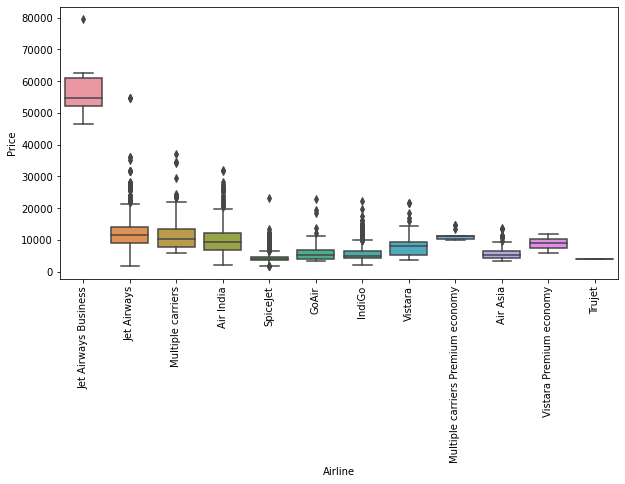

In [31]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Airline',y='Price',data=data.sort_values('Price',ascending=False))
plt.xticks(rotation='vertical')

**Conclusion-->  From graph we can see that Jet Airways Business have the highest Price., Apart from the first Airline almost all are having similar median**

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

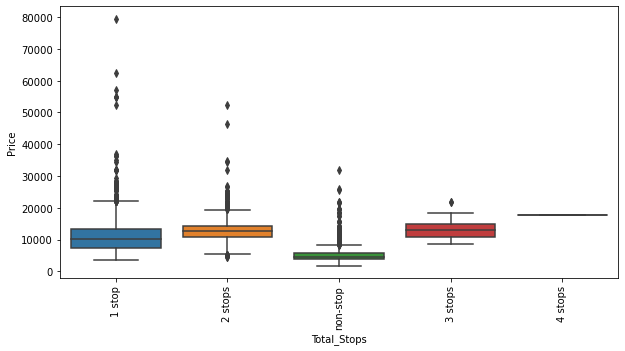

In [32]:
  plt.figure(figsize=(10,5))
sns.boxplot(x='Total_Stops',y='Price',data=data.sort_values('Price',ascending=False))
plt.xticks(rotation='vertical')

In [33]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding
Airline=pd.get_dummies(cat_df['Airline'], drop_first=True)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


<Figure size 1080x360 with 0 Axes>

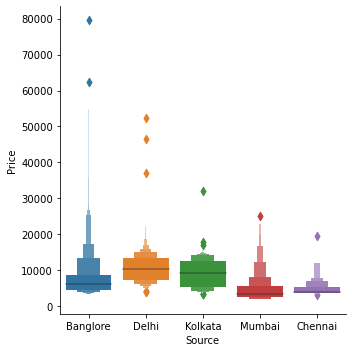

In [34]:
# Source vs Price

plt.figure(figsize=(15,5))
sns.catplot(y='Price',x='Source',data=data.sort_values('Price',ascending=False),kind='boxen')

In [35]:
Sources=pd.get_dummies(cat_df['Source'], drop_first=True)
Sources.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [36]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding

Destination=pd.get_dummies(cat_df['Destination'], drop_first=True)
Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [37]:
cat_df['Route_1']=cat_df['Route'].str.split('→').str[0]
cat_df['Route_2']=cat_df['Route'].str.split('→').str[1]
cat_df['Route_3']=cat_df['Route'].str.split('→').str[2]
cat_df['Route_4']=cat_df['Route'].str.split('→').str[3]
cat_df['Route_5']=cat_df['Route'].str.split('→').str[4]

<ipython-input-37-1258b4fd659f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df['Route_1']=cat_df['Route'].str.split('→').str[0]
<ipython-input-37-1258b4fd659f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df['Route_2']=cat_df['Route'].str.split('→').str[1]
<ipython-input-37-1258b4fd659f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

In [38]:
cat_df.drop('Route',axis=1,inplace=True)

C:\Users\Himalay\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [39]:
cat_df.isnull().sum()

Airline                0
Source                 0
Destination            0
Total_Stops            0
Additional_Info        0
Route_1                0
Route_2                0
Route_3             3491
Route_4             9116
Route_5            10636
dtype: int64

In [40]:
for i in ['Route_3','Route_4','Route_5']:
    cat_df[i].fillna('None',inplace=True)

C:\Users\Himalay\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [41]:
cat_df.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
Route_1            0
Route_2            0
Route_3            0
Route_4            0
Route_5            0
dtype: int64

In [42]:
for i in cat_df.columns:
    print(i,'has no of ',cat_df[i].nunique(),'Categories.\n')

Airline has no of  12 Categories.

Source has no of  5 Categories.

Destination has no of  6 Categories.

Total_Stops has no of  5 Categories.

Additional_Info has no of  10 Categories.

Route_1 has no of  5 Categories.

Route_2 has no of  45 Categories.

Route_3 has no of  30 Categories.

Route_4 has no of  14 Categories.

Route_5 has no of  6 Categories.



### as we will see we have lots of features in Route , one hot encoding will not be a better option lets appply Label Encoding

In [43]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [44]:
for i in ['Route_1', 'Route_2', 'Route_3', 'Route_4','Route_5']:
    cat_df[i]=encoder.fit_transform(cat_df[i])

<ipython-input-44-ad1b9d66b987>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df[i]=encoder.fit_transform(cat_df[i])


In [45]:
cat_df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,non-stop,No info,0,13,29,13,5
1,Air India,Kolkata,Banglore,2 stops,No info,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2 stops,No info,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1 stop,No info,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1 stop,No info,0,34,8,13,5


**Additional_Info contains almost 80% no_info,so we can drop this column**

In [46]:
cat_df.drop('Additional_Info',axis=1,inplace=True)

C:\Users\Himalay\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [47]:
cat_df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [48]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding key

stops={'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [49]:
cat_df['Total_Stops']=cat_df['Total_Stops'].map(stops)

<ipython-input-49-b2a8f7c2c93e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df['Total_Stops']=cat_df['Total_Stops'].map(stops)


In [50]:
cat_df

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,0,0,13,29,13,5
1,Air India,Kolkata,Banglore,2,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1,0,34,8,13,5
...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,2,5,29,13,5
10679,Air India,Kolkata,Banglore,0,2,5,29,13,5
10680,Jet Airways,Banglore,Delhi,0,0,13,29,13,5
10681,Vistara,Banglore,New Delhi,0,0,13,29,13,5


In [51]:
train_data=pd.concat([cat_df,Airline,Sources,Destination,data[num_col]],axis=1)

In [52]:
train_data.drop(columns=['Airline','Source','Destination'],inplace=True)

In [53]:
pd.set_option('display.max_columns',None)
train_data.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Price,Journey_Day,Month,dep_hour,dep_min,Arrival_hour,Arrival_min,dur_hr,dur_min
0,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3897,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7662,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,13882,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6218,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13302,3,1,16,50,21,35,4,45


#### dealing with Outliers:

In [54]:
train_data['Price']=data['Price']

In [55]:
def plot(df,col):
    fig,(ax1,ax2)=plt.subplots(2,1)
    sns.distplot(df[col],ax=ax1)
    sns.boxplot(df[col],ax=ax2)

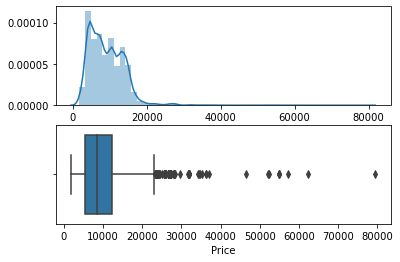

In [56]:
plot(train_data,'Price')

In [57]:
train_data['Price']=np.where(train_data['Price']>=40000,train_data['Price'].median(),train_data['Price'])

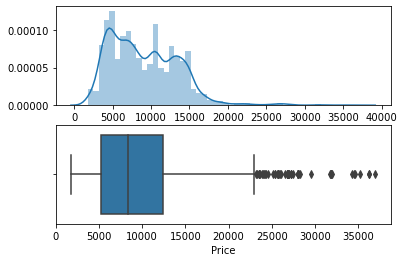

In [58]:
plot(train_data,'Price')

In [59]:
### separating independent & dependent data:
x=train_data.drop('Price',axis=1)

In [60]:
y=train_data['Price']

In [61]:
x.isnull().sum()


Total_Stops                          0
Route_1                              0
Route_2                              0
Route_3                              0
Route_4                              0
Route_5                              0
Air India                            0
GoAir                                0
IndiGo                               0
Jet Airways                          0
Jet Airways Business                 0
Multiple carriers                    0
Multiple carriers Premium economy    0
SpiceJet                             0
Trujet                               0
Vistara                              0
Vistara Premium economy              0
Chennai                              0
Delhi                                0
Kolkata                              0
Mumbai                               0
Cochin                               0
Delhi                                0
Hyderabad                            0
Kolkata                              0
New Delhi                

In [62]:
x.shape


(10682, 34)

In [63]:
y.shape

(10682,)

### Feature Selection
    Finding out the best feature which will contribute and have good relation with target variable. 
    
### Why to apply Feature Selection?
    To select important features to get rid of curse of dimensionality ie..to get rid of duplicate features

In [64]:
from sklearn.feature_selection import mutual_info_regression


In [65]:
imp_col=mutual_info_regression(x,y)

In [66]:
imp_col=pd.Series(imp_col,index=x.columns).sort_values(ascending=False)
imp_col

Route_1                              0.942121
Route_2                              0.873631
Total_Stops                          0.790226
Route_3                              0.561897
Jet Airways                          0.556670
Cochin                               0.519701
Delhi                                0.516014
dur_hr                               0.474967
Kolkata                              0.459380
Arrival_hour                         0.402932
IndiGo                               0.357270
dur_min                              0.350404
dep_hour                             0.348614
Arrival_min                          0.338766
Delhi                                0.318044
Route_4                              0.304547
Air India                            0.290250
Multiple carriers                    0.265804
dep_min                              0.258417
Month                                0.235443
SpiceJet                             0.210520
Mumbai                            

In [67]:
imp_col.head(25).index

Index(['Route_1', 'Route_2', 'Total_Stops', 'Route_3', 'Jet Airways', 'Cochin',
       'Delhi', 'dur_hr', 'Kolkata', 'Arrival_hour', 'IndiGo', 'dur_min',
       'dep_hour', 'Arrival_min', 'Delhi', 'Route_4', 'Air India',
       'Multiple carriers', 'dep_min', 'Month', 'SpiceJet', 'Mumbai',
       'Hyderabad', 'Journey_Day', 'New Delhi'],
      dtype='object')

In [68]:
x=x[imp_col.head(25).index]

In [69]:
x

,Route_1,Route_2,Total_Stops,Route_3,Jet Airways,Cochin,Delhi,Delhi,dur_hr,Kolkata,Kolkata,Arrival_hour,IndiGo,dur_min,dep_hour,Arrival_min,Delhi,Delhi,Route_4,Air India,Multiple carriers,dep_min,Month,SpiceJet,Mumbai,Hyderabad,Journey_Day,New Delhi
0,0,13,0,29,0,0,0,0,2,0,0,1,1,50,22,10,0,0,13,0,0,20,3,0,0,0,24,1
1,2,25,2,1,0,0,0,0,7,1,0,13,0,25,5,15,0,0,3,1,0,50,1,0,0,0,5,0
2,3,32,2,4,1,1,1,0,19,0,0,4,0,0,9,25,1,0,5,0,0,25,9,0,0,0,6,0
3,2,34,1,3,0,0,0,0,5,1,0,23,1,25,18,30,0,0,13,0,0,5,12,0,0,0,5,0
4,0,34,1,8,0,0,0,0,4,0,0,21,1,45,16,35,0,0,13,0,0,50,1,0,0,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,2,5,0,29,0,0,0,0,2,1,0,22,0,30,19,25,0,0,13,0,0,55,9,0,0,0,4,0
10679,2,5,0,29,0,0,0,0,2,1,0,23,0,35,20,20,0,0,13,1,0,45,4,0,0,0,27,0
10680,0,13,0,29,1,0,0,1,3,0,0,11,0,0,8,20,0,1,13,0,0,20,4,0,0,0,27,0
10681,0,13,0,29,0,0,0,0,2,0,0,14,0,40,11,10,0,0,13,0,0,30,1,0,0,0,3,1


In [70]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [71]:
X_train.shape

(8545, 28)

In [72]:
X_test.shape

(2137, 28)

In [73]:
from sklearn import metrics
import matplotlib.pyplot as plt

def summary(ml_model):
    model=ml_model.fit(X_train,y_train)
  
    
    print('Train data R-square value is ',model.score(X_train,y_train))
    print('Test data R-square value is',model.score(X_test,y_test))
    print('For Train Data MAE: ',metrics.mean_absolute_error(y_train,model.predict(X_train)))
    print('For Train Data MSE: ',metrics.mean_squared_error(y_train,model.predict(X_train)))
    print('For Train Data RMSE: ',np.sqrt(metrics.mean_squared_error(y_train,model.predict(X_train))))
      
    print('For Test Data MAE:',metrics.mean_absolute_error(y_test,model.predict(X_test)))
    print('For Test Data MSE:',metrics.mean_squared_error(y_test,model.predict(X_test)))
    print('For Test Data RMSE:',np.sqrt(metrics.mean_squared_error(y_test,model.predict(X_test))))
    
    
    
   

In [74]:
from sklearn.linear_model import LinearRegression

In [75]:
summary(LinearRegression())

Train data R-square value is  0.6063450982228132
Test data R-square value is 0.6156505370089316
For Train Data MAE:  1968.7053808899182
For Train Data MSE:  7612896.889579332
For Train Data RMSE:  2759.1478556937345
For Test Data MAE: 1922.9673218063513
For Test Data MSE: 7256794.148871395
For Test Data RMSE: 2693.843749899276


In [76]:
from sklearn.ensemble import RandomForestRegressor

In [77]:
summary(RandomForestRegressor())

Train data R-square value is  0.9546857270336432
Test data R-square value is 0.8247480248660993
For Train Data MAE:  545.9772386856106
For Train Data MSE:  876333.2709988339
For Train Data RMSE:  936.1267387479294
For Test Data MAE: 1161.8279535940326
For Test Data MSE: 3308883.269493209
For Test Data RMSE: 1819.033608676104


In [78]:
from sklearn.tree import DecisionTreeRegressor

In [79]:
summary(DecisionTreeRegressor())

Train data R-square value is  0.9683394255461503
Test data R-square value is 0.7238911419505828
For Train Data MAE:  308.0963331382875
For Train Data MSE:  612284.2309186659
For Train Data RMSE:  782.485930172975
For Test Data MAE: 1346.7220636406175
For Test Data MSE: 5213133.719380622
For Test Data RMSE: 2283.22879260503


### here we can see Decision tree has high variance so to overcome that  we use random forest algorythm.

#### Hyperparameter Tuning
    1.Choose following method for hyperparameter tuning
        a.RandomizedSearchCV --> Fast way to Hypertune model
        b.GridSearchCV--> Slow way to hypertune my model
    
    2.Assign hyperparameters in form of dictionary
    3.Fit the model
    4.Check best paramters and best score

In [80]:
from sklearn.model_selection import RandomizedSearchCV

In [89]:
# Number of trees in random forest
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=6)]

# Number of features to consider at every split
max_features=['auto','sqrt']

# Maximum number of levels in tree
max_depth=[int(x) for x in np.linspace(5,30,num=4)]

# Minimum number of samples required to split a node
min_samples_split=[5,10,15,100]

In [90]:

random_grid={
    'n_estimators':n_estimators,
    'max_features':max_features,
'max_depth':max_depth,
    'min_samples_split':min_samples_split
}

In [97]:
random_m=RandomizedSearchCV(RandomForestRegressor(),param_distributions=random_grid,cv=5,verbose=2,n_jobs=-1)

In [99]:
random_m.best_params_

{'n_estimators': 320,
 'min_samples_split': 15,
 'max_features': 'auto',
 'max_depth': 13}

In [98]:
summary(random_m)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   37.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.5min finished


Train data R-square value is  0.9011623411771663
Test data R-square value is 0.853995155884475
For Train Data MAE:  911.0834787194289
For Train Data MSE:  1911422.67511137
For Train Data RMSE:  1382.5421060898543
For Test Data MAE: 1133.7841652020581
For Test Data MSE: 2756676.4117192035
For Test Data RMSE: 1660.324188741224


####  here i  am getting 85% R-square values which is very good compare to others model.

##### Save the model to reuse it again

In [100]:
! pip install pickle

ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


In [101]:
import pickle

In [124]:
 file=open('C:\\Users\\Himalay\\Downloads\\Air price predict Model\\random_m.pkl','wb')
        

In [125]:
pickle.dump(random_m,file)

In [126]:
### Loading the ml model:
l=open('C:\\Users\\Himalay\\Downloads\\Air price predict Model\\random_m.pkl','rb')


In [127]:
w=pickle.load(l)

In [133]:
X_temp=train_data.drop(columns='Price')
Y_temp=train_data['Price']

In [131]:
X_temp

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Journey_Day,Month,dep_hour,dep_min,Arrival_hour,Arrival_min,dur_hr,dur_min
0,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,1,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,2,5,29,13,5,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,4,9,19,55,22,25,2,30
10679,0,2,5,29,13,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,27,4,20,45,23,20,2,35
10680,0,0,13,29,13,5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,27,4,8,20,11,20,3,0
10681,0,0,13,29,13,5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,3,1,11,30,14,10,2,40


In [134]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [138]:
remove_col=correlation(X_temp,0.8)
remove_col

{'Cochin', 'Hyderabad', 'Kolkata', 'Route_3'}

In [139]:
X_temp=X_temp.drop(columns=remove_col)
X_temp.head()

,Total_Stops,Route_1,Route_2,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Mumbai,Delhi,New Delhi,Journey_Day,Month,dep_hour,dep_min,Arrival_hour,Arrival_min,dur_hr,dur_min
0,0,0,13,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,24,3,22,20,1,10,2,50
1,2,2,25,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,1,5,50,13,15,7,25
2,2,3,32,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,6,9,9,25,4,25,19,0
3,1,2,34,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,5,12,18,5,23,30,5,25
4,1,0,34,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,3,1,16,50,21,35,4,45


In [143]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_temp,Y_temp,test_size=0.2,random_state=2)


In [144]:
summary(LinearRegression())

Train data R-square value is  0.6179164850994707
Test data R-square value is 0.6050891057986993
For Train Data MAE:  1919.3264356065363
For Train Data MSE:  7261654.819072819
For Train Data RMSE:  2694.745780045461
For Test Data MAE: 1974.5909003442555
For Test Data MSE: 7974204.121399068
For Test Data RMSE: 2823.863332634756


In [145]:
summary(RandomForestRegressor())

Train data R-square value is  0.9532513310148573
Test data R-square value is 0.8252788907318878
For Train Data MAE:  553.9826312002833
For Train Data MSE:  888477.7389822211
For Train Data RMSE:  942.5909711970623
For Test Data MAE: 1124.568983823292
For Test Data MSE: 3528040.9076559944
For Test Data RMSE: 1878.3079906277337
